In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly
import math
import random

from IPython.display import display, HTML

In [2]:
dysp_df = pd.read_csv('dysp.csv', sep='\t' , lineterminator='\r',index_col=[0,1])
dysp_all_df = pd.read_csv('dysp_all.csv',sep='\t' , lineterminator ='\r', index_col=None)

In [3]:
dysp_all_df.head()
len(dysp_all_df['SUBJECT_ID'].unique())

325

In [4]:
new_dysp_df = pd.DataFrame()
SUBJECT_LIST = []
idx_count = 0 
FMT = '%Y-%m-%d %H:%M:%S'

# Filter dataframe to only includes pantients with readmission in ± 30 days

In [5]:
for idx, row in dysp_df.groupby(level=[0]):
    HADM_ID = dysp_df.loc[idx].index[0]
    
    if(idx in SUBJECT_LIST):
        
        continue
        
    else:
        SUBJECT_LIST.append(idx)
        
        for i in range(idx_count, len(dysp_all_df) ):

            #IF THE SAME SUBJECT MUST CHECK THE HADM_ID
            if(idx==dysp_all_df.iloc[i,[0]].item()):
                
                idx_count += 1 
                
                #IF THEY HAVE THE SAME HADM_ID, JUST APPEND BECAUSE THEY HAVE SAME DATE
                if(HADM_ID == dysp_all_df.iloc[i,[1]].item()):
                    new_dysp_df = new_dysp_df.append(dysp_all_df.iloc[i])
                    
                    
                #DIFFERENT HADM_ID MUST CHECK DATE
                else:
                    
                    at1 = datetime.strptime(row['ADMITTIME'].values[0], FMT)
                    dt1 = datetime.strptime(row['DISCHTIME'].values[0], FMT)
                    at2 = datetime.strptime(dysp_all_df.iloc[i,[6]].item(), FMT)
                    dt2 = datetime.strptime(dysp_all_df.iloc[i,[7]].item(), FMT)
                    
                    
                    if(at2 < at1):
                        td = dt2 - at1
                        if(abs(td.days) <= 30 and abs(td.days) > 0):
                            new_dysp_df = new_dysp_df.append(dysp_all_df.iloc[i])
                            
                    elif(at2 > at1):
                        td = dt1 - at2
                        if (abs(td.days) <= 30 and abs(td.days) < 0):
                            new_dysp_df = new_dysp_df.append(dysp_all_df.iloc[i])
                    else:
                        continue
 
                    

            # NOT THE SAME SUBJECT   
            else: # Se llego a otro subject
                break   


# Lets check if they died during this 30 day period

In [6]:
new_dysp_df.head()

,ADMITTIME,DEATHTIME,DIAGNOSIS,DISCHTIME,ETHNICITY,GENDER,HADM_ID,ICD9_CODE,PRO_SHORT_TITLE,Pro_ICD9,SEQ_NUM,SHORT_TITLE,SUBJECT_ID,age,marital_status,religion
0,2173-03-24 22:13:00,NaN,CONGESTIVE HEART FAILURE,2173-04-08 14:45:00,WHITE,M,117029.0,42833,Rt/left heart card cath,3723.0,1.0,Ac on chr diast hrt fail,422.0,58.0,MARRIED,CATHOLIC
1,2173-03-24 22:13:00,NaN,CONGESTIVE HEART FAILURE,2173-04-08 14:45:00,WHITE,M,117029.0,42833,Lt heart angiocardiogram,8853.0,1.0,Ac on chr diast hrt fail,422.0,58.0,MARRIED,CATHOLIC
2,2173-03-24 22:13:00,NaN,CONGESTIVE HEART FAILURE,2173-04-08 14:45:00,WHITE,M,117029.0,42833,Coronar arteriogr-2 cath,8856.0,1.0,Ac on chr diast hrt fail,422.0,58.0,MARRIED,CATHOLIC
3,2173-03-24 22:13:00,NaN,CONGESTIVE HEART FAILURE,2173-04-08 14:45:00,WHITE,M,117029.0,42833,Venous cath NEC,3893.0,1.0,Ac on chr diast hrt fail,422.0,58.0,MARRIED,CATHOLIC
4,2173-03-24 22:13:00,NaN,CONGESTIVE HEART FAILURE,2173-04-08 14:45:00,WHITE,M,117029.0,51881,Rt/left heart card cath,3723.0,2.0,Acute respiratry failure,422.0,58.0,MARRIED,CATHOLIC


Reordering colmns

In [7]:
columnsTitles = ['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE','SHORT_TITLE', 'SEQ_NUM', 'DIAGNOSIS' ,'ADMITTIME' ,'DISCHTIME' ,'DEATHTIME','age','GENDER','marital_status','ETHNICITY', 'religion','PRO_SHORT_TITLE', 'Pro_ICD9']

new_dysp_df = new_dysp_df.reindex(columns=columnsTitles)
new_dysp_df.head()

,SUBJECT_ID,HADM_ID,ICD9_CODE,SHORT_TITLE,SEQ_NUM,DIAGNOSIS,ADMITTIME,DISCHTIME,DEATHTIME,age,GENDER,marital_status,ETHNICITY,religion,PRO_SHORT_TITLE,Pro_ICD9
0,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Rt/left heart card cath,3723.0
1,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Lt heart angiocardiogram,8853.0
2,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Coronar arteriogr-2 cath,8856.0
3,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Venous cath NEC,3893.0
4,422.0,117029.0,51881,Acute respiratry failure,2.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Rt/left heart card cath,3723.0


In [8]:
dysp_df.to_csv('new_dysp_df.csv',sep='\t' , line_terminator='\r')

Let's extract the ones who died in hospital

In [9]:
dead_dysp_df = new_dysp_df[new_dysp_df['DEATHTIME'] != 0]
                           
print(len(new_dysp_df[new_dysp_df['DEATHTIME'] != 0].SUBJECT_ID.unique()))

325


Theres 28 with dyspnea who died in that ± 30 day period

In [10]:
len(new_dysp_df[(new_dysp_df['DEATHTIME'] == new_dysp_df['DISCHTIME'])].SUBJECT_ID.unique())

28

28 death where in did in that 30 day period

In [11]:
new_dysp_df.groupby(['SUBJECT_ID','HADM_ID','DIAGNOSIS']).head()

,SUBJECT_ID,HADM_ID,ICD9_CODE,SHORT_TITLE,SEQ_NUM,DIAGNOSIS,ADMITTIME,DISCHTIME,DEATHTIME,age,GENDER,marital_status,ETHNICITY,religion,PRO_SHORT_TITLE,Pro_ICD9
0,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Rt/left heart card cath,3723.0
1,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Lt heart angiocardiogram,8853.0
2,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Coronar arteriogr-2 cath,8856.0
3,422.0,117029.0,42833,Ac on chr diast hrt fail,1.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Venous cath NEC,3893.0
4,422.0,117029.0,51881,Acute respiratry failure,2.0,CONGESTIVE HEART FAILURE,2173-03-24 22:13:00,2173-04-08 14:45:00,NaN,58.0,M,MARRIED,WHITE,CATHOLIC,Rt/left heart card cath,3723.0
138,878.0,102365.0,2352,Unc behav neo intestine,1.0,ANEMIA,2137-10-07 17:09:00,2137-10-31 14:30:00,NaN,76.0,F,WIDOWED,BLACK,PROTESTANT QUAKER,Insert endotracheal tube,9604.0
139,878.0,102365.0,2352,Unc behav neo intestine,1.0,ANEMIA,2137-10-07 17:09:00,2137-10-31 14:30:00,NaN,76.0,F,WIDOWED,BLACK,PROTESTANT QUAKER,Cont inv mec ven 96+ hrs,9672.0
140,878.0,102365.0,2352,Unc behav neo intestine,1.0,ANEMIA,2137-10-07 17:09:00,2137-10-31 14:30:00,NaN,76.0,F,WIDOWED,BLACK,PROTESTANT QUAKER,Sm bowel endoscopy NEC,4513.0
141,878.0,102365.0,2352,Unc behav neo intestine,1.0,ANEMIA,2137-10-07 17:09:00,2137-10-31 14:30:00,NaN,76.0,F,WIDOWED,BLACK,PROTESTANT QUAKER,Clos large bowel biopsy,4525.0
142,878.0,102365.0,2352,Unc behav neo intestine,1.0,ANEMIA,2137-10-07 17:09:00,2137-10-31 14:30:00,NaN,76.0,F,WIDOWED,BLACK,PROTESTANT QUAKER,Venous cath NEC,3893.0


In [12]:
SUBJECT_HADM_COUNT = new_dysp_df.groupby(['SUBJECT_ID','HADM_ID','DEATHTIME']).size().reset_index().rename(columns={0:'count'})
print(SUBJECT_HADM_COUNT.head(), 'Theres ' + str(len(SUBJECT_HADM_COUNT)) + ' Admissions')

   SUBJECT_ID   HADM_ID            DEATHTIME  count
0      4155.0  124456.0  2154-08-06 02:21:00     81
1      4399.0  175418.0  2138-09-25 03:52:00     36
2      7999.0  144083.0  2196-09-29 07:51:00     24
3      9789.0  171922.0  2194-03-01 14:48:00     14
4     10337.0  156022.0  2169-11-21 12:00:00    168 Theres 28 Admissions


Theres 353 unique admissions, let extract them as a list of tuples

In [13]:
icd_hadm = {}
HADM_ID = 0
SUBJECT_ID = 0
READMITTED = []

for idx, row in new_dysp_df.groupby(['SUBJECT_ID']):
    
    if len(row['HADM_ID'].unique()) > 1:
        READMITTED += [[idx, len(row['HADM_ID'].unique())]]
        icd_hadm[idx] = (list(row['HADM_ID'].unique()))

print((READMITTED))

[[4730.0, 2], [5060.0, 2], [9186.0, 2], [11486.0, 3], [12194.0, 2], [15401.0, 2], [15793.0, 2], [15904.0, 2], [20988.0, 2], [22754.0, 2], [24631.0, 2], [27964.0, 2], [31262.0, 2], [32247.0, 3], [47556.0, 2], [55049.0, 2], [55559.0, 2], [56502.0, 3], [59505.0, 2], [61943.0, 2], [69000.0, 2], [70330.0, 2], [74894.0, 2], [80350.0, 2], [95895.0, 2]]


Dictionary for each patient and admission

In [14]:
new_dysp_dic = dict(list(new_dysp_df.groupby(['SUBJECT_ID','HADM_ID'])))

In [15]:
len(new_dysp_df['ICD9_CODE'].unique())

1291

Theres 1290 ICD_codes, each but each has a sequence

-------------------------

# BRL

Lets create BRL input file

In [30]:
dysp_brl_df = pd.DataFrame()

In [31]:
dysp_brl_df['#SUBJECT_ID'] = new_dysp_df['SUBJECT_ID'].unique()
dysp_brl_df.head()

,#SUBJECT_ID
0,422.0
1,878.0
2,969.0
3,1008.0
4,1552.0


Create target class for multiples admissions

In [32]:
# for key in icd_hadm:
#     dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']==key].index.values.astype(int)[0], 'ADM'] = "READMITTED"
    
# dysp_brl_df=dysp_brl_df.fillna('SINGLE_ADM')


dead = new_dysp_df[(new_dysp_df['DEATHTIME'] == new_dysp_df['DISCHTIME'])].SUBJECT_ID.unique()
for SUBJECT_ID in dead:
    dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']==SUBJECT_ID].index.values.astype(int)[0], '@DIH'] = "DEAD"
    
dysp_brl_df=dysp_brl_df.fillna('ALIVE')


dysp_brl_df.head()

,#SUBJECT_ID,@DIH
0,422.0,ALIVE
1,878.0,ALIVE
2,969.0,ALIVE
3,1008.0,ALIVE
4,1552.0,ALIVE


In [33]:
dysp_brl_df.groupby('@DIH')['#SUBJECT_ID'].nunique()

@DIH
ALIVE    297
DEAD      28
Name: #SUBJECT_ID, dtype: int64

Now lets add desired features to dataframe

Lets say we want ICD top 1 for each , age, gender, marital_status and ethnicity

Create row for smokers

Extract other features

In [34]:
subject_id = 0
count = 0
TITLES = []
for idx, row in dysp_df.iterrows():
     dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'PRO1'] = row['PRO_SHORT_TITLE']
    if(idx[0] != subject_id):
        count = 0
        subject_id = idx[0]
        dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'PRO1'] = row['PRO_SHORT_TITLE']
    
    else:
        if(count == 1):
            dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'PRO2'] = row['PRO_SHORT_TITLE']
        elif(count == 2):
            dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'PRO3'] = row['PRO_SHORT_TITLE']
        elif(count ==3):
            dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'PRO4'] = row['PRO_SHORT_TITLE']
        elif(count == 4):
             dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'PRO5'] = row['PRO_SHORT_TITLE']
            
            
    #dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'ICD_SHORT'] = row['SHORT_TITLE']
    #dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'ETHNICITY'] = row['ETHNICITY']
    dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'age'] = row['age']
    #dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'marital_status'] = row['marital_status']
    #dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'GENDER'] = row['GENDER']
    #dysp_brl_df.loc[ dysp_brl_df[dysp_brl_df['#SUBJECT_ID']== float(idx[0])].index.values.astype(int)[0], 'relgion'] = row['religion']
    
    
    count += 1
    
dysp_brl_df['PRO1'] = dysp_brl_df['PRO1'].fillna('NoPro')
dysp_brl_df['PRO2'] = dysp_brl_df['PRO2'].fillna('NoPro')
dysp_brl_df['PRO3'] = dysp_brl_df['PRO3'].fillna('NoPro')
dysp_brl_df['PRO4'] = dysp_brl_df['PRO4'].fillna('NoPro')
dysp_brl_df['PRO5'] = dysp_brl_df['PRO5'].fillna('NoPro')
dysp_brl_df = dysp_brl_df.fillna('none')

In [35]:
display(dysp_brl_df.head())

,#SUBJECT_ID,@DIH,PRO1,age,PRO2,PRO3,PRO4,PRO5
0,422.0,ALIVE,Rt/left heart card cath,58.0,Lt heart angiocardiogram,Coronar arteriogr-2 cath,Venous cath NEC,NoPro
1,878.0,ALIVE,Insert endotracheal tube,76.0,Cont inv mec ven 96+ hrs,Sm bowel endoscopy NEC,Clos large bowel biopsy,Venous cath NEC
2,969.0,ALIVE,Imp/rep CRT pacemakr gen,83.0,Revision of lead,Rt heart cardiac cath,CV cath plcmt w guidance,NoPro
3,1008.0,ALIVE,Insert endotracheal tube,45.0,Cont inv mec ven <96 hrs,Arterial catheterization,NoPro,NoPro
4,1552.0,ALIVE,Insert endotracheal tube,51.0,Cont inv mec ven <96 hrs,NoPro,NoPro,NoPro


In [511]:
path = '/home/manodg/Documents/brl-structure-priors-master/'
dysp_brl_df.to_csv('/home/manodg/Documents/brl-structure-priors-master/dysp_brl.txt',sep='\t' , line_terminator='\r' , index=False)

---------------------------------

# CODE FOR SANKEY

Create labels list containing first the diagnosis, then icd9 codes, after that alive or dead for sankey diagram

In [16]:
new_dysp_df = pd.read_csv('new_dysp_df.csv', sep='\t' , lineterminator='\r')

In [17]:
labels = []
labels = labels + dysp_df['PRO_SHORT_TITLE'].unique().tolist() + ['ALIVE','DEAD']
print(labels[-5:])

['App adhesion barrier sub', 'Endo emb hd/nk,bare coil', 'Comb alcohol/drug detox', 'ALIVE', 'DEAD']


In [18]:
len(labels)-3

306

In [19]:
dysp_san_df = pd.DataFrame()
dysp_san_df['#SUBJECT_ID'] = new_dysp_df['SUBJECT_ID'].unique()
count = 1
subject_id = 0
for idx, row in dysp_df.iterrows():
    
    if(idx[0] != subject_id):
        count = 1
        subject_id = idx[0]
        dysp_san_df.loc[ dysp_san_df[dysp_san_df['#SUBJECT_ID']== idx[0]].index.values.astype(int)[0], 'PRO'+str(count)] = row['PRO_SHORT_TITLE']
    
    else:
        dysp_san_df.loc[ dysp_san_df[dysp_san_df['#SUBJECT_ID']== idx[0]].index.values.astype(int)[0], 'PRO'+str(count)] = row['PRO_SHORT_TITLE']
        
    count += 1
    
dysp_san_df = dysp_san_df.fillna('NoPro')

In [20]:
for idx, row in dysp_san_df.iterrows():
    if(row['PRO1'] == 'NoPro'):
        dysp_san_df = dysp_san_df.drop(idx)

In [21]:
dead = new_dysp_df[(new_dysp_df['DEATHTIME'] == new_dysp_df['DISCHTIME'])].SUBJECT_ID.unique()

for SUBJECT_ID in dead:
    dysp_san_df.loc[ dysp_san_df[dysp_san_df['#SUBJECT_ID']==SUBJECT_ID].index.values.astype(int)[0], '@DIH'] = "DEAD"

dysp_san_df=dysp_san_df.fillna('ALIVE')

dysp_san_df.to_csv('SANKEY.csv',sep='\t' , line_terminator='\r',index=False)

In [22]:
for idx, row in dysp_san_df.iterrows():
    if(row['@DIH'] == 'ALIVE'):
        dysp_san_df = dysp_san_df.drop(idx)

In [23]:
sources = []

for i in range(len(dysp_san_df)):
    for j in range(len(dysp_san_df.iloc[i].tolist()[1:])): 

        if(dysp_san_df.iloc[i].tolist()[1:][j] == 'NoPro'):
            break
        else:
            sources += [labels.index(dysp_san_df.iloc[i].tolist()[1:][j])]

In [24]:
targets = []
for i in range(len(dysp_san_df)):
    for j in range(len(dysp_san_df.iloc[i].tolist()[2:])):
        if(dysp_san_df.iloc[i].tolist()[2:][j] == 'NoPro'):
            targets += [labels.index(dysp_san_df.iloc[i].tolist()[2:][-1])]
            break
        else:
            targets += [labels.index(dysp_san_df.iloc[i].tolist()[2:][j])]

In [25]:
match_count = {}
values= []
for s in range(len(sources)-1):
    key = (sources[s],targets[s])
    if key not in match_count:
        match_count[key] = 0
    match_count[key] += 1

In [26]:
for key, val in match_count.items():
    temp = val
    values.append(temp)

In [27]:
n = len(labels)

colors = []

for i in range(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256 

    colors.append("rgba"+str((r,g,b,0.8)))

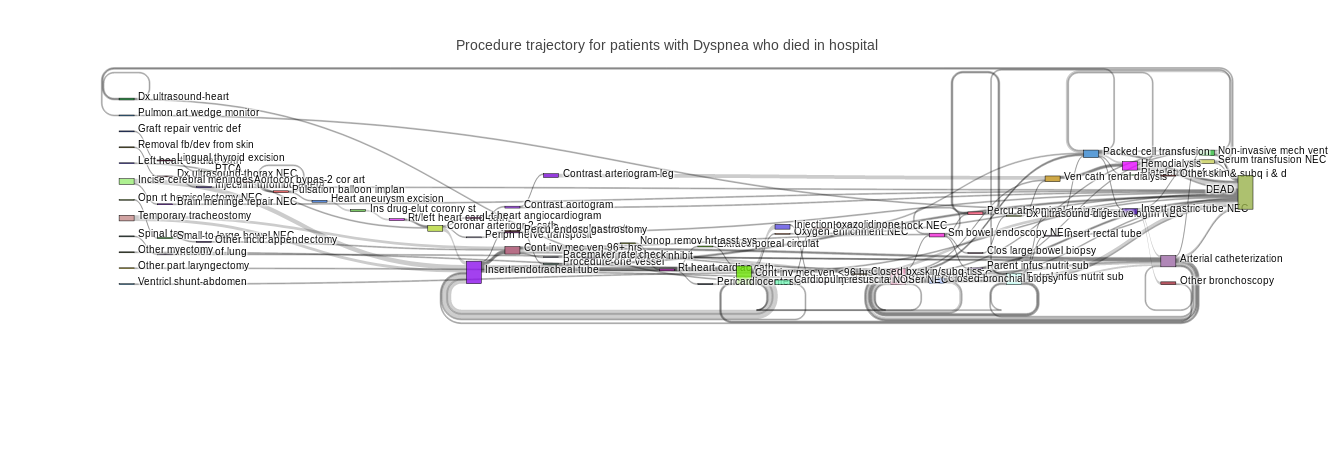

In [34]:
import plotly.graph_objs as go

fig = go.FigureWidget(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = colors
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = targets,
      value = values
  ))])
                      
fig.layout.update(title_text="Procedure trajectory for patients with Dyspnea who died in hospital", font_size=10)
fig.show()